<a href="https://colab.research.google.com/github/mehrnazeraeisi/KnnClassifier_Result/blob/main/Climate_Model_Simulation_40966.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#   مشاهده نمودارها برای هر درصد دلخواه
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20):
    # مرحله 1: محاسبه Accuracy برای تک‌ویژگی‌ها
    def compute_acc_per_feature(X, y):
        feature_scores = []
        for feature in X.columns:
            model = KNeighborsClassifier()
            model.fit(X[[feature]], y)
            y_pred = model.predict(X[[feature]])
            acc=accuracy_score(y, y_pred)
            feature_scores.append((feature, acc))
        df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
        return df_scores.sort_values(by='Accuracy', ascending=False)

    # مرحله 2: بررسی گروه‌های افزایشی ویژگی‌ها
    def evaluate_incremental_feature_groups(X, y, sorted_features):
        results = []
        best_acc = -np.inf
        best_group = []
        for k in range(1, len(sorted_features) + 1):
            group = sorted_features[:k]
            model = KNeighborsClassifier()
            model.fit(X[group], y)
            y_pred = model.predict(X[group])
            acc=accuracy_score(y, y_pred)
            results.append((k, acc))
            if acc > best_acc:
                best_acc = acc
                best_group = group
        # اضافه کردن All Features به لیست
        model.fit(X, y)
        y_pred = model.predict(X)
        all_acc = accuracy_score(y, y_pred)
        results.append(("All Features", all_acc))
        return pd.DataFrame(results, columns=["Group Size", "Accuracy"]), best_group

    # اجرای مراحل
    single_feat_df = compute_acc_per_feature(X_data, y_data)
    sorted_features = single_feat_df['Feature'].tolist()
    group_results_df, best_group = evaluate_incremental_feature_groups(X_data, y_data, sorted_features)

    # مرحله 3: چاپ نتایج اولیه
    print("📌 نتایج Accuracy برای هر ویژگی:")
    print(single_feat_df.to_string(index=False))

    print("\n📊 نتایج عملکرد گروه‌های افزایشی Accuracy:")
    print(group_results_df.to_string(index=False))

    best_acc = group_results_df[group_results_df["Group Size"] == len(best_group)]["Accuracy"].values[0]

    print("\n🏆 بهترین گروه:")
    print(f"📌 تعداد ویژگی‌ها: {len(best_group)}")
    print(f"🔹 Accuracy: {best_acc:.4f}")

    # مرحله 4: ارزیابی نهایی با Split و رسم نمودار
    acc_scores = {"all_features": [], "best_group": []}

    feature_groups = {
        "all_features": X_data.columns.tolist(),
        "best_group": best_group
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)
        for group_name, group_features in feature_groups.items():
            model = KNeighborsClassifier()
            model.fit(X_train[group_features], y_train)
            y_pred = model.predict(X_test[group_features])
            acc_scores[group_name].append(accuracy_score(y_test, y_pred))

    # رسم نمودار Accuracy
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(8, 4))
    for name, acc in acc_scores.items():
        plt.plot(x, acc, label=f"{name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel("Repeat")
    plt.ylabel("Accuracy")
    plt.title("KNN Classifier Accuracy Performance")
    plt.legend()
    plt.grid(True)
    plt.show()


    # چاپ نتایج نهایی میانگین
    print("\n📈 میانگین نتایج پس از تکرار:")
    for name in feature_groups:
        avg_acc = np.mean(acc_scores[name])
        print(f"{name.replace('_', ' ').title()} → Accuracy: {avg_acc:.4f}")


In [4]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.1 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=041be8f1b8f1284d79548ec5cb132300052ba3ed7ce39c2b86a4792ec9dbd13b
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


(1080, 78)
Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'rating'],
      dtype='object')
    DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    

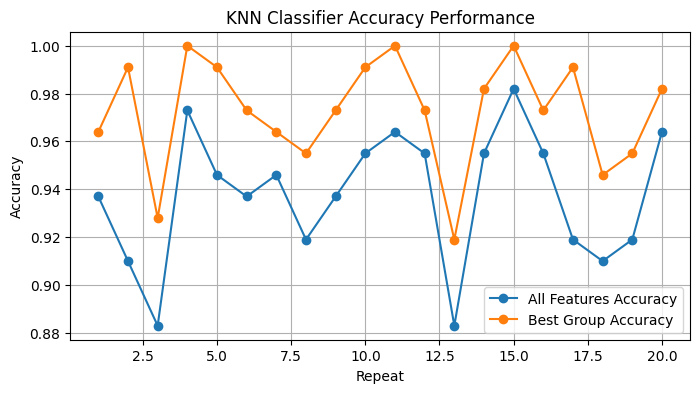


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.9374
Best Group → Accuracy: 0.9725


In [5]:
# Climate Model Simulation
# شبیه‌سازی آب‌وهوا (دوتایی)
import openml
import pandas as pd

dataset = openml.datasets.get_dataset(40966)
data, y_data, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# 🔧 افزودن target به dataframe کامل (مثل خواندن فایل CSV)
data['rating'] = y_data  # فرض می‌گیریم نام ستون هدف "rating" باشه برای یکسان بودن با مثال شما

print(data.shape)
# حذف سطرهای حاوی NaN
data = data.dropna()

# 🔍 نمایش اطلاعات
print(data.columns)
print(data.head())
print(data.shape)

# 🎯 جدا کردن ویژگی‌ها و برچسب‌ها (مطابق ساختار شما)
X_data = data.drop('rating', axis=1)
y_data = data['rating']

evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20)


In [6]:
def knn_classification_results_table_from_xy(X_data, y_data, test_sizes=[0.1, 0.13, 0.16, 0.19, 0.25], n_repeats=20):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import pandas as pd
    import numpy as np

    feature_names = X_data.columns.tolist()

    # مرحله 1: محاسبه دقت (Accuracy) برای هر ویژگی
    scores = []
    for feature in feature_names:
        model = KNeighborsClassifier()
        model.fit(X_data[[feature]], y_data)
        y_pred = model.predict(X_data[[feature]])
        acc = accuracy_score(y_data, y_pred)
        scores.append((feature, acc))

    df_scores = pd.DataFrame(scores, columns=['Feature', 'Accuracy']).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

    # مرحله 2: یافتن بهترین گروه ویژگی‌ها
    best_acc = -np.inf
    best_group = []
    for k in range(1, len(df_scores) + 1):
        group = df_scores['Feature'][:k].tolist()
        model = KNeighborsClassifier()
        model.fit(X_data[group], y_data)
        y_pred = model.predict(X_data[group])
        acc = accuracy_score(y_data, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_group = group

    # مرحله 3: اجرای آزمایش روی چند test size و تکرار
    detailed_results = []
    for ts in test_sizes:
        for repeat in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=ts)

            # مدل روی همه ویژگی‌ها
            model_all = KNeighborsClassifier()
            model_all.fit(X_train, y_train)
            y_pred_all = model_all.predict(X_test)
            acc_all = accuracy_score(y_test, y_pred_all)

            # مدل روی گروه ویژگی‌های منتخب
            model_best = KNeighborsClassifier()
            model_best.fit(X_train[best_group], y_train)
            y_pred_best = model_best.predict(X_test[best_group])
            acc_best = accuracy_score(y_test, y_pred_best)

            # ذخیره در جدول نتایج
            detailed_results.append({
                'Test Size': ts,
                'Repeat': repeat,
                'All_Accuracy': acc_all,
                'Best_Accuracy': acc_best
            })

    return pd.DataFrame(detailed_results)


In [5]:

# Climate Model Simulation
# شبیه‌سازی آب‌وهوا (دوتایی)
import openml
import pandas as pd

dataset = openml.datasets.get_dataset(40966)
data, y_data, _, _ = dataset.get_data(target=dataset.default_target_attribute)

data['rating'] = y_data


print(data.shape)
# حذف سطرهای حاوی NaN
data = data.dropna()
print(data.shape)


# 🎯 جدا کردن ویژگی‌ها و برچسب‌ها (مطابق ساختار شما)
X = data.drop('rating', axis=1)
y = data['rating']

# اجرای تابع جدول
df_result = knn_classification_results_table_from_xy(X, y)
print(df_result)


(1080, 78)
(552, 78)
    Test Size  Repeat  All_Accuracy  Best_Accuracy
0        0.10       1      0.946429       0.946429
1        0.10       2      0.946429       1.000000
2        0.10       3      0.964286       0.982143
3        0.10       4      0.982143       1.000000
4        0.10       5      0.928571       1.000000
..        ...     ...           ...            ...
95       0.25      16      0.898551       0.971014
96       0.25      17      0.942029       0.985507
97       0.25      18      0.942029       1.000000
98       0.25      19      0.956522       0.978261
99       0.25      20      0.942029       0.956522

[100 rows x 4 columns]
